# Import library

In [168]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [169]:
img = cv2.imread("C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\Dataset\\ronaldo\\cristiano-ronaldo-of-juventus-looks-on-prior-the-serie-a-match-and-picture-id1165233827.jpg")
img.shape

(382, 612, 3)

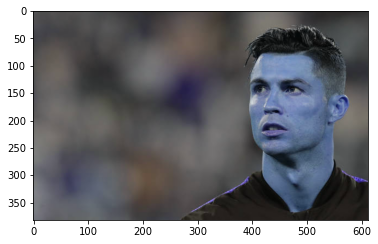

In [170]:

plt.imshow(img)

In [171]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convert image into gray image becasuse haarcaascade only work gray image
gray.shape


(382, 612)

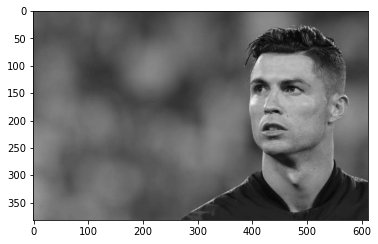

In [172]:
plt.imshow(gray, cmap='gray')#showing the gray images

# importing Harcascade classifier


In [173]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\saurav aditya\\Desktop\\machine learning\\image classiifier\\project1\\haar cascade\\haar-cascade-files-master\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\saurav aditya\\Desktop\\machine learning\\image classiifier\\project1\\haar cascade\\haar-cascade-files-master\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)#detecing face image
faces

array([[357,  73, 176, 176]], dtype=int32)

In [174]:
(x,y,w,h)= faces[0]
x,y,w,h

(357, 73, 176, 176)

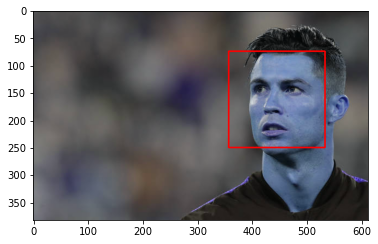

In [175]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img) #constructing rectangle on orignal image


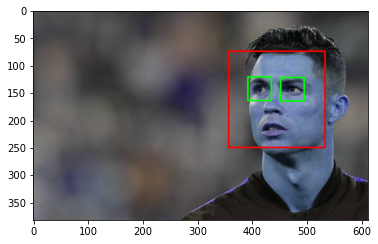

In [176]:
cv2.destroyAllWindows() #This function will dedect and create both face and eye.
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


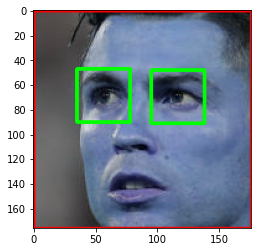

In [177]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')#This will display only region of interst image.

In [178]:
cropped_img = np.array(roi_color)
cropped_img.shape

(176, 176, 3)

In [179]:
def get_cropped_image_if_2_eyes(image_path):#this function will crop the original image and display region of interst image or face under rectangle
    img = cv2.imread(image_path)
    if(img is not None):
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

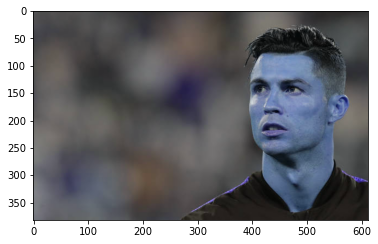

In [180]:
original_image = cv2.imread('C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\Dataset\\ronaldo\\cristiano-ronaldo-of-juventus-looks-on-prior-the-serie-a-match-and-picture-id1165233827.jpg')
plt.imshow(original_image)

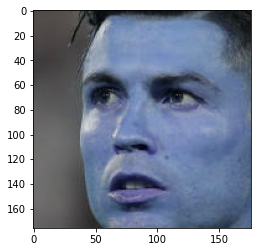

In [181]:
cropped_image = get_cropped_image_if_2_eyes('C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\Dataset\\ronaldo\\cristiano-ronaldo-of-juventus-looks-on-prior-the-serie-a-match-and-picture-id1165233827.jpg')
plt.imshow(cropped_image)

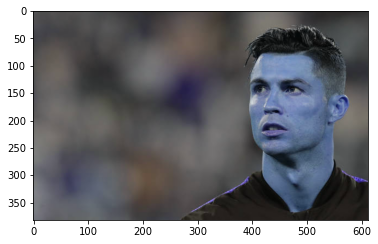

In [182]:
org_image_obstructed = cv2.imread('C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\Dataset\\ronaldo\\cristiano-ronaldo-of-juventus-looks-on-prior-the-serie-a-match-and-picture-id1165233827.jpg')
plt.imshow(org_image_obstructed)

In [183]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\Dataset\\ronaldo\\cristiano-ronaldo-of-juventus-looks-on-prior-the-serie-a-match-and-picture-id1165233827.jpg')
cropped_image_no_2_eyes #function will not return anything if the face and 2 or more than 2 eyes are not detected.

array([[[ 76,  71,  68],
        [ 77,  72,  69],
        [ 77,  72,  69],
        ...,
        [ 37,  39,  39],
        [ 41,  43,  43],
        [ 37,  39,  39]],

       [[ 76,  71,  68],
        [ 77,  72,  69],
        [ 77,  72,  69],
        ...,
        [ 18,  20,  20],
        [ 26,  28,  28],
        [ 30,  32,  32]],

       [[ 77,  72,  69],
        [ 77,  72,  69],
        [ 78,  73,  70],
        ...,
        [  8,  10,  10],
        [  9,  11,  11],
        [ 14,  16,  16]],

       ...,

       [[103, 101, 101],
        [102, 100, 100],
        [102, 100, 100],
        ...,
        [ 85, 107, 142],
        [ 84, 106, 142],
        [ 85, 107, 143]],

       [[102, 100, 100],
        [102, 100, 100],
        [101,  99,  99],
        ...,
        [ 82, 104, 139],
        [ 83, 105, 141],
        [ 83, 105, 141]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 82, 104, 139],
        [ 81, 103, 139],
        [ 79, 101, 137]]

In [184]:

path_to_data = "./dataset/"#path of the directory of current dataset
path_to_cr_data = "./dataset/cropped/"#path of directory of the cropped file.
path_to_tr_data="C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data"

In [185]:
import os#importing the os
img_dirs = []#making a list
for entry in os.scandir(path_to_data):#scanning the path of subfolder within folders
    if entry.is_dir():
        img_dirs.append(entry.path)#append the path into the list

In [186]:
img_dirs

['./dataset/messi', './dataset/ranbir', './dataset/ronaldo', './dataset/srk']

# Directory of the list of final train data

In [187]:
import os#importing the os
#tr_img_dirs = []#making a list
tr_img=[]
for entry in os.scandir(path_to_tr_data):#scanning the path of subfolder within folders
   tr_img.append(entry.path)
print(tr_img)


['C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1', 'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\ranbir1', 'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\ronaldo1', 'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\srk1']


In [188]:

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)#create the crop folder to the dataset place

In [189]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(path_to_tr_data)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

messi
Generating cropped images in folder:  ./dataset/cropped/messi
ranbir
Generating cropped images in folder:  ./dataset/cropped/ranbir
ronaldo
Generating cropped images in folder:  ./dataset/cropped/ronaldo
srk
Generating cropped images in folder:  ./dataset/cropped/srk


# Wavelet Transform


In [190]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

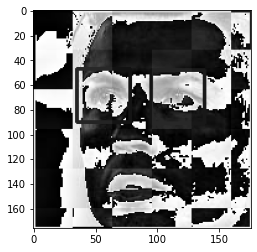

In [191]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [192]:
celebrity_file_names_dict = {}
for img in tr_img:
    celebrity_name = img.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img):
        file_list.append(entry.path)
        
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'messi1': ['C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1\\messi1.png',
  'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1\\messi2.png',
  'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1\\messi3.png',
  'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1\\messi4.png',
  'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1\\messi6.png',
  'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\messi1\\messi7.png'],
 'ranbir1': ['C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\ranbir1\\ranbir14.png',
  'C:\\Users\\saurav aditya\\Desktop\\Deep learning\\celebration image classification\\train_data\\ranbir1\\ranbir16.png',
  'C:\\Users

In [193]:

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'messi1': 0, 'ranbir1': 1, 'ronaldo1': 2, 'srk1': 3}

In [194]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        #print(training_files)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [195]:
len(X[0])

4096

In [196]:

print(X[0])

[[250]
 [228]
 [230]
 ...
 [227]
 [226]
 [ 59]]


In [197]:
y[0]

0

In [198]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(24, 4096)

# Model Training

In [199]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6

In [201]:
len(X_test)

5

In [202]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [203]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [204]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\saurav aditya\anaconda3\envs\tensorflo\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\saurav aditya\anaconda3\envs\tensorflo\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\saurav aditya\anaconda3\envs\tensorflo\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,model,best_score,best_params
0,svm,0.400000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.416667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.500000,{'logisticregression__C': 1}


In [205]:
best_estimators['svm'].score(X_test,y_test) #score on test set

0.6

In [206]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [207]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [208]:
best_clf=best_estimators['logistic_regression']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

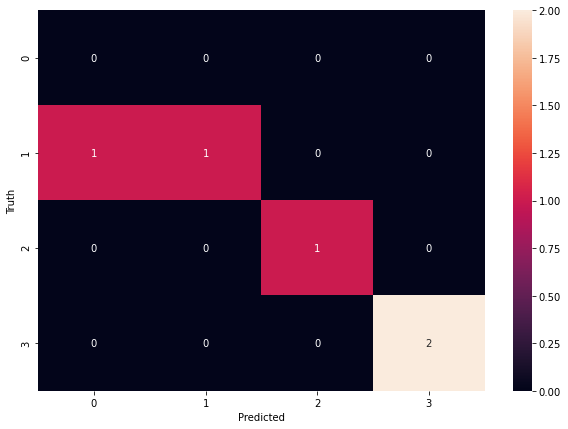

In [210]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [221]:
class_dict

{'messi1': 0, 'ranbir1': 1, 'ronaldo1': 2, 'srk1': 3}

In [222]:
best_clf.predict(X_test)

array([1, 0, 3, 2, 3])

In [223]:
y_test

[1, 1, 3, 2, 3]

In [224]:
best_clf.score(X_train,y_train)

1.0

In [225]:
best_clf.score(X_test,y_test)

0.8

In [226]:
#len(y_test)
print(y)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]
